# Logistic回归

&emsp;&emsp;Logistic回归是一个用回归的方法分类的模型。考虑以下问题：

> 有一批鸢尾花的数据

> 花萼长度 | 花萼宽度 | 花瓣长度 | 花瓣宽度 | 类别
> -|-|-|-|-
> 5.1 | 3.5 | 1.4 | 0.2 | 山鸢尾
> 4.9 | 3.0 | 1.4 | 0.2 | 山鸢尾
> 4.7 | 3.2 | 1.3 | 0.2 | 山鸢尾
> 4.6 | 3.1 | 1.5 | 0.2 | 山鸢尾
> 5.0 | 3.6 | 1.4 | 0.2 | 山鸢尾
> 5.4 | 3.9 | 1.7 | 0.4 | 山鸢尾
> ||||
> 7.0 | 3.2 | 4.7 | 1.4 | 杂色鸢尾
> 6.4 | 3.2 | 4.5 | 1.5 | 杂色鸢尾
> 6.9 | 3.1 | 4.9 | 1.5 | 杂色鸢尾
> 5.5 | 2.3 | 4.0 | 1.3 | 杂色鸢尾
> 6.5 | 2.8 | 4.6 | 1.5 | 杂色鸢尾
> 5.7 | 2.8 | 4.5 | 1.3 | 杂色鸢尾

<center><font color=gray>数据集1</font></center>

> 给定下列数据:

> 花萼长度 | 花萼宽度 | 花瓣长度 | 花瓣宽度 | 类别
> -|-|-|-|-
> 5.7 | 2.8 | 4.1 | 1.3 | ？
> 5.0 | 3.3 | 1.4 | 0.2 | ？

<center><font color=gray>数据集2</font></center>

> 判断以上两朵鸢尾花的类别。

&emsp;&emsp;我们要判断数据集2的两朵鸢尾花属于哪个类别，也就是说，这是个分类问题，而且是二分类问题。我们试试用线性回归解决这个问题。

&emsp;&emsp;先把数据处理一下，便于处理：
+ 山鸢尾 -> 0
+ 杂色鸢尾 -> 1

&emsp;&emsp;所以数据集1变成

> 花萼长度 | 花萼宽度 | 花瓣长度 | 花瓣宽度 | 类别
> -|-|-|-|-
> 5.1 | 3.5 | 1.4 | 0.2 | 0
> 4.9 | 3.0 | 1.4 | 0.2 | 0
> 4.7 | 3.2 | 1.3 | 0.2 | 0
> 4.6 | 3.1 | 1.5 | 0.2 | 0
> 5.0 | 3.6 | 1.4 | 0.2 | 0
> 5.4 | 3.9 | 1.7 | 0.4 | 0
> 7.0 | 3.2 | 4.7 | 1.4 | 1
> 6.4 | 3.2 | 4.5 | 1.5 | 1
> 6.9 | 3.1 | 4.9 | 1.5 | 1
> 5.5 | 2.3 | 4.0 | 1.3 | 1
> 6.5 | 2.8 | 4.6 | 1.5 | 1
> 5.7 | 2.8 | 4.5 | 1.3 | 1

<center><font color=gray>数据集1</font></center>

## 修改线性模型的输出 | sigmoid

&emsp;&emsp;我们的任务是二分类，也就是说，我们输入一朵不知类别的鸢尾花的四个属性:花萼长度，花萼宽度，花瓣长度，花瓣宽度到模型之后，希望得到模型预测的这朵鸢尾花的类别。我们希望使用线性回归模型解决这个分类问题，这时问题就来了：  
&emsp;&emsp;回归模型的输出值$\hat y \in R$，也就是说，理论上，回归模型的输出值有无限种可能。但此处的任务只需要两种输出——0和1。因此，我们需要对模型的输出做出限制,使模型的输出只有0和1。

&emsp;&emsp;阶跃函数是这个需求的理想解决方法。其函数表达式为:
$$
sign(x)=\left\{
\begin{aligned}
1 & (x > 0) \\
0.5 & (x < 0)  \\
0 & (x = 0) 
\end{aligned}
\right.
$$

&emsp;&emsp;其函数图像如下

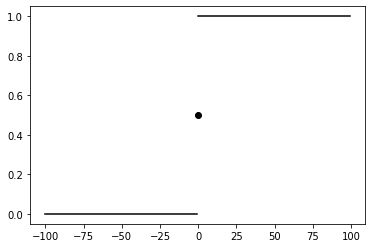

In [3]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(-100, 0)], [0 for i in range(-100, 0)], c='k')
plt.plot([i for i in range(0, 100)], [1 for i in range(0, 100)], c='k')
plt.scatter([0], [0.5], c='k')
plt.show()

![png](figure_1.png)
<center><font color=gray>图1</font></center>

&emsp;&emsp;这个函数能够很好地满足我们的需求。然鹅，这个模型有个大问题——它在$x=0$不连续，这对求导带来了麻烦。而机器学习的很多分类方法都需要求导。所以不用使用这个函数。因此，我们需要寻找其他函数，它需要
+ （1）满足二分类的需求，即输出只有两种可能
+ （2）函数是连续的

&emsp;&emsp;对于logistic回归，人们通常使用sigmoid函数。这个函数满足我们的需求。